# Информация о покупателях с добавлением меток классов (olist_classified_public_dataset.csv)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
classified_data = pd.read_csv(r'C:\Users\Вячеслав\Documents\olist_churn\olist-ml-churn-prediction\data\raw\olist_classified_public_dataset.csv').drop('Unnamed: 0', axis=1)

In [3]:
display(classified_data.head())
print(classified_data.shape)
print(classified_data.dtypes.nunique())

,id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,votes_delayed,votes_low_quality,votes_return,votes_not_as_anounced,votes_partial_delivery,votes_other_delivery,votes_other_order,votes_satisfied,most_voted_subclass,most_voted_class
0,1,delivered,89.99,14.38,1,1,2017-08-30 11:41:01.000000,2017-08-30 11:55:08.970352,2017-09-21 00:00:00.000000,2017-09-08 20:35:27.276847,...,0,0,0,0,0,0,0,3,satisfeito,satisfeito_com_pedido
1,2,delivered,69.00,15.23,1,1,2017-09-26 09:13:36.000000,2017-09-26 09:28:10.922048,2017-10-24 00:00:00.000000,2017-09-29 21:13:04.984841,...,0,0,0,0,0,0,0,0,antes_prazo,satisfeito_com_pedido
2,3,delivered,99.80,15.86,2,4,2018-01-15 15:50:42.000000,2018-01-17 07:29:56.419769,2018-02-05 00:00:00.000000,2018-01-23 17:51:31.134866,...,0,0,0,0,3,0,0,0,entrega_parcial,problemas_de_entrega
3,4,delivered,87.00,12.74,1,1,2018-02-04 11:16:42.000000,2018-02-06 05:31:50.990164,2018-03-13 00:00:00.000000,2018-02-20 19:38:06.633080,...,3,0,0,0,0,0,0,0,atrasado,problemas_de_entrega
4,5,delivered,99.90,17.95,1,2,2017-12-07 11:58:42.000000,2017-12-08 02:36:49.587515,2018-01-03 00:00:00.000000,2017-12-19 22:33:18.952512,...,0,0,0,0,3,0,0,0,entrega_parcial,problemas_de_entrega


(3584, 33)
3


### Пояснения к признакам:
1. *id* - id;
2. *order_status* - статус заказа;
3. *order_products_value* - суммарная стоимость товаров в заказе;
4. *order_freight_value* - стоимость доставки;
5. *order_items_qty* - количество товаров в заказе;
6. *order_sellers_qty* - неясно, пояснений от заказчика нет, лучше удалить;
7. *order_purchase_timestamp* - время покупки;
8. *order_aproved_at* - время подтверждения заказа;
9. *order_estimated_delivery_date* - ожидаемая дата доставки;
10. *order_delivered_customer_date* - время доставки;
11. *customer_city* - город покупателя;
12. *customer_state* - штат (регион) покупателя;
13. *customer_zip_code_prefix* - число принадлежности к определенному региону для покупателя (аналог почтового индекса);
14. *product_category_name* - название категории товара;
15. *product_name_lenght* - длина названия товара в символах;
16. *product_description_lenght* - длина описания товара в символах;
17. *product_photos_qty* - количество фото товара;
18. *review_score* - оценка товара по пятибальной шкале;
19. *review_comment_title* - все значения NaN, удалить;
20. *review_comment_message* - обзор на товар;
21. *review_creation_date* - дата создания анкеты для пользователя с целью оценить качество услуг;
22. *review_answer_timestamp* - дата ответа пользователем на анкету;
23. *votes_before_estimate* - голоса экспертов за то, что товар приехал ранее ориентировочного срока;
24. *votes_delayed* - голоса экспертов за опоздание товара;
25. *votes_low_quality* - голоса экспертов за низкое качество товара;
26. *votes_return* - голоса экспертов за то, был ли возвращен товар на основе содержания комментария к этому товару;
27. *votes_not_as_anounced* - голоса экспертов за несоответствие товара ожиданию;
28. *votes_partial_delivery* - голоса экспертов за факт доставки неполной комплектации товара;
29. *votes_other_delivery* - не до конца ясно, предположительно, доставка неправильного вида;
30. *votes_other_order* - голоса за получение неправильного заказа;
31. *votes_satisfied* - голоса за то, удовлетворен ли покупатель;
32. *most_voted_subclass* - второй по количеству голосов класс комментария пользователя;
33. *most_voted_class* - первый по количеству голосов класс.

In [4]:
print(classified_data.dtypes)

id                                 int64
order_status                      object
order_products_value             float64
order_freight_value              float64
order_items_qty                    int64
order_sellers_qty                  int64
order_purchase_timestamp          object
order_aproved_at                  object
order_estimated_delivery_date     object
order_delivered_customer_date     object
customer_city                     object
customer_state                    object
customer_zip_code_prefix           int64
product_category_name             object
product_name_lenght                int64
product_description_lenght         int64
product_photos_qty                 int64
review_score                       int64
review_comment_title             float64
review_comment_message            object
review_creation_date              object
review_answer_timestamp           object
votes_before_estimate              int64
votes_delayed                      int64
votes_low_qualit

#### Типы данных в порядке за исключением временных признаков. Сконвертируем их в datetime позже.

#### Разделим признаки на 3 группы: категориальные, численные (+ дискретные) и временные.

In [5]:
df = classified_data.copy()

In [6]:
categorical_features = ['order_status', 'customer_city', 'customer_state',
                        'product_category_name', 'most_voted_subclass', 'most_voted_class']
numerical_features = ['order_products_value', 'order_freight_value', 'order_items_qty',
                      'product_name_lenght',
                      'product_description_lenght', 'product_photos_qty', 'review_score']
time_features = ['order_purchase_timestamp', 'order_aproved_at', 'order_estimated_delivery_date',
                 'order_delivered_customer_date', 'review_creation_date', 'review_answer_timestamp']
other_features = ['id', 'review_comment_message', 'customer_zip_code_prefix']

In [7]:
print(df.isna().sum())

id                                  0
order_status                        0
order_products_value                0
order_freight_value                 0
order_items_qty                     0
order_sellers_qty                   0
order_purchase_timestamp            0
order_aproved_at                    0
order_estimated_delivery_date       0
order_delivered_customer_date     117
customer_city                       0
customer_state                      0
customer_zip_code_prefix            0
product_category_name               0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
review_score                        0
review_comment_title             3584
review_comment_message              0
review_creation_date                0
review_answer_timestamp             0
votes_before_estimate               0
votes_delayed                       0
votes_low_quality                   0
votes_return                        0
votes_not_as

#### В признаке *review_comment_title* пропущены все значения. Уберем его.

In [8]:
df = df.drop('review_comment_title', axis=1)

#### Признак *order_sellers_qty* несет неизвестную нам информацию. Решено удалить для интерпретируемости.

In [9]:
df = df.drop('order_sellers_qty', axis=1)

## Временные признаки

#### Обработаем time-фичи:

In [10]:
display(df[time_features].head())

,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,review_creation_date,review_answer_timestamp
0,2017-08-30 11:41:01.000000,2017-08-30 11:55:08.970352,2017-09-21 00:00:00.000000,2017-09-08 20:35:27.276847,2017-09-09 00:00:00.000000,2017-09-10 03:27:54+00:00
1,2017-09-26 09:13:36.000000,2017-09-26 09:28:10.922048,2017-10-24 00:00:00.000000,2017-09-29 21:13:04.984841,2017-09-30 00:00:00.000000,2017-10-03 05:34:20+00:00
2,2018-01-15 15:50:42.000000,2018-01-17 07:29:56.419769,2018-02-05 00:00:00.000000,2018-01-23 17:51:31.134866,2018-01-24 00:00:00.000000,2018-02-02 17:42:43+00:00
3,2018-02-04 11:16:42.000000,2018-02-06 05:31:50.990164,2018-03-13 00:00:00.000000,2018-02-20 19:38:06.633080,2018-02-21 00:00:00.000000,2018-02-22 02:09:12+00:00
4,2017-12-07 11:58:42.000000,2017-12-08 02:36:49.587515,2018-01-03 00:00:00.000000,2017-12-19 22:33:18.952512,2017-12-20 00:00:00.000000,2017-12-23 04:17:03+00:00


#### Мы уже знаем о пропусках в столбце order_delivered_customer_date. Они означают, что заказ пользователю еще не был доставлен. Было решено убрать этих пользователей из анализа, так как мы не имеем информации об оценках качества продукта.

In [11]:
df.shape

(3584, 31)

In [12]:
df = df.dropna(subset=['order_delivered_customer_date'])

In [13]:
df.shape

(3467, 31)

#### Переведем тип каждого временного признака в datetime из object:

In [14]:
for col in df[time_features].drop('review_answer_timestamp', axis=1):
    df[col] = pd.to_datetime(
        df[col],
        format='%Y-%m-%d %H:%M:%S.%f')

In [15]:
df['review_answer_timestamp'] = pd.to_datetime(
    df['review_answer_timestamp'],
    utc=True,           # раз везде +0000, сразу локализуем в UTC
    errors='raise')      # если встретите битую строку — получите исключение
df['review_answer_timestamp'] = df['review_answer_timestamp'].dt.tz_localize(None)

In [16]:
display(df[time_features])

,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,review_creation_date,review_answer_timestamp
0,2017-08-30 11:41:01,2017-08-30 11:55:08.970352,2017-09-21,2017-09-08 20:35:27.276847,2017-09-09,2017-09-10 03:27:54
1,2017-09-26 09:13:36,2017-09-26 09:28:10.922048,2017-10-24,2017-09-29 21:13:04.984841,2017-09-30,2017-10-03 05:34:20
2,2018-01-15 15:50:42,2018-01-17 07:29:56.419769,2018-02-05,2018-01-23 17:51:31.134866,2018-01-24,2018-02-02 17:42:43
3,2018-02-04 11:16:42,2018-02-06 05:31:50.990164,2018-03-13,2018-02-20 19:38:06.633080,2018-02-21,2018-02-22 02:09:12
4,2017-12-07 11:58:42,2017-12-08 02:36:49.587515,2018-01-03,2017-12-19 22:33:18.952512,2017-12-20,2017-12-23 04:17:03
...,...,...,...,...,...,...
3578,2018-02-12 16:07:34,2018-02-12 16:27:39.816713,2018-02-26,2018-02-15 19:16:54.139873,2018-02-16,2018-02-20 13:52:22
3580,2017-05-11 12:29:55,2017-05-11 13:05:49.204273,2017-05-31,2017-05-16 14:17:47.915865,2017-05-17,2017-05-18 04:15:26
3581,2017-05-21 20:15:25,2017-05-23 03:42:32.806938,2017-06-13,2017-05-30 14:14:50.522442,2017-05-31,2017-06-01 21:36:36
3582,2017-09-29 16:05:14,2017-09-29 16:27:57.145051,2017-11-13,2017-10-25 03:35:57.037048,2017-10-25,2017-10-25 21:20:43


In [17]:
print(df[time_features].dtypes)

order_purchase_timestamp         datetime64[ns]
order_aproved_at                 datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_delivered_customer_date    datetime64[ns]
review_creation_date             datetime64[ns]
review_answer_timestamp          datetime64[ns]
dtype: object


#### Создадим краткую сводку в таблице:

In [28]:
def datetime_summary(df: pd.DataFrame, cols: list[str] | None = None, as_days: bool = True) -> pd.DataFrame:
    stats = []
    for c in cols:
        col_min = df[c].min()
        col_max = df[c].max()
        delta = col_max - col_min          # Timedelta
        if as_days:
            delta = delta / pd.Timedelta(days=1)  # float in days
        stats.append({"feature": c,
                      "min": col_min,
                      "max": col_max,
                      "range": delta})

    return pd.DataFrame(stats).sort_values("feature", ignore_index=True)


In [29]:
datetime_summary(df, time_features, True)

,feature,min,max,range
0,order_aproved_at,2017-02-22 19:10:13.808801,2018-04-12 08:32:30.966241,413.557143
1,order_delivered_customer_date,2017-03-10 07:27:38.850482,2018-05-09 21:33:21.272362,425.587297
2,order_estimated_delivery_date,2017-03-30 00:00:00.000000,2018-05-17 00:00:00.000000,413.000000
3,order_purchase_timestamp,2017-02-22 18:56:05.000000,2018-04-11 14:51:31.000000,412.830162
4,review_answer_timestamp,2017-05-01 07:30:41.000000,2018-04-19 15:02:53.000000,353.314028
5,review_creation_date,2017-03-11 00:00:00.000000,2018-04-18 00:00:00.000000,403.000000


#### Имеем следующую информацию о временных признаках:
1. Первое значение в датасете датируется 22 февраля 2017 года, а последнее - 17 мая 2017 года.
2. Имеем данные за промежуток примерно 1 год и 2 месяца (425 дней).

#### На основе временных признаков можно создать новые полезные и хорошо интерпретируемые:
1. Время между оплатой заказа и подтверждением заказа на сайте (order_approved_at - order_purchase_timestamp).
2. Время между подтверждением заказа и ориентировочным времени доставки (order_estimated_delivery_date - order_aproved_at).
3. Время между фактическим времени доставки и ожидаемым (order_delivered_customer_date - order_estimated_delivery_date).
4. Время между рассылкой с просьбой оценить качество и ответом покупателя (review_answer_timestamp - review_creation_date).
5. Время между подтверждением заказа и его прибытием (order_delivered_customer_date - order_aproved_at).

In [45]:
def new_time_features(data, feature_1, feature_2):
    return (data[feature_2] - data[feature_1]).dt.total_seconds() / 3600

In [46]:
df['aproved-purchased'] = new_time_features(df, 'order_purchase_timestamp', 'order_aproved_at')
df['estimated_delivery-aproved'] = new_time_features(df, 'order_aproved_at', 'order_estimated_delivery_date')
df['actual_delivery-estimated_delivery'] = new_time_features(df, 'order_estimated_delivery_date', 'order_delivered_customer_date')
df['review_answer-review_creation'] = new_time_features(df, 'review_creation_date', 'review_answer_timestamp')
df['actual_delivery-aproved'] = new_time_features(df, 'order_aproved_at', 'order_delivered_customer_date')

In [47]:
display(df[['aproved-purchased', 'estimated_delivery-aproved', 'actual_delivery-estimated_delivery', 'review_answer-review_creation', 'actual_delivery-aproved']].head())

,aproved-purchased,estimated_delivery-aproved,actual_delivery-estimated_delivery,review_answer-review_creation,actual_delivery-aproved
0,0.235547,516.080842,-291.409090,27.465000,224.671752
1,0.243034,662.530299,-578.781949,77.572222,83.748351
2,39.654005,448.500995,-294.141351,233.711944,154.359643
3,42.252497,834.469169,-484.364824,26.153333,350.104345
4,14.635441,621.386226,-337.444735,76.284167,283.941490


#### Значения показывают количество часов разницы. В случае с разницей в доставке число отрицательное если заказ был доставлен раньше ориентировочного числа (скорее хорошо), и положительное, если была задержка по сравнению с ориентировочным числом (скорее плохо).

## Целевая переменная

#### Цель проекта - предсказание оттока клиентов, однако изначально в наших данных нет метки того, ушел клиент или нет. В таком случае сами создадим эту метку применив следующие возможные подходы :
1. Можно взять дату и время последней покупки клиента. Если покупка была сделана более чем 'X' дней назад, то метка класса будет '0', иначе '1'. Протестируем значения 60, 90 и 120 дней.
2. Эмпирически найти перцентили как breakpoints.

#### Первый подход:

## Категориальные признаки

In [23]:
display(df[categorical_features].head())

,order_status,customer_city,customer_state,product_category_name,most_voted_subclass,most_voted_class
0,delivered,Belo Horizonte,MG,beleza_saude,satisfeito,satisfeito_com_pedido
1,delivered,Pocos de Caldas,MG,brinquedos,antes_prazo,satisfeito_com_pedido
2,delivered,Sao Jose dos Campos,SP,ferramentas_jardim,entrega_parcial,problemas_de_entrega
3,delivered,Ribeirao Preto,SP,informatica_acessorios,atrasado,problemas_de_entrega
4,delivered,RIO DE JANEIRO,RJ,cama_mesa_banho,entrega_parcial,problemas_de_entrega


In [24]:
for col in categorical_features:
    print(f"--- {col} ---")
    print(df[col].value_counts())
    print()

--- order_status ---
order_status
delivered     3467
shipped         48
canceled        25
invoiced        24
processing      20
Name: count, dtype: int64

--- customer_city ---
customer_city
Sao Paulo         438
RIO DE JANEIRO    276
Belo Horizonte     79
BRASILIA           74
Salvador           65
                 ... 
Buriticupu          1
Camacari            1
Toledo              1
Roda Velha          1
Braganca            1
Name: count, Length: 897, dtype: int64

--- customer_state ---
customer_state
SP    1369
RJ     505
MG     438
RS     188
PR     161
BA     150
SC     118
GO      84
PE      76
DF      74
ES      70
CE      58
PA      58
MT      42
MA      41
AL      24
PI      24
PB      23
RN      21
MS      18
SE      16
TO      10
RO       7
AM       5
AC       3
RR       1
Name: count, dtype: int64

--- product_category_name ---
product_category_name
cama_mesa_banho                                   471
moveis_decoracao                                  302
beleza_saude   

#### Распределения значений категориальных признаков достаточно чистые. Однако нужно совершить дополнительные преобразования:
1. Привести значения строк всех буквенных признаков, кроме *review_comment_message* к lowercase с отступами (пример: RIO DE JANEIRO --> rio_de_janeiro).
2. С помощью набора данных product_category_name_translation.csv перевести названия товаров с бразильского на английский для понятности.

#### Приведение к lowercase:

In [25]:
def to_new_value_fmt(s: str) -> str:
    if pd.isna(s): # пропуски не трогаем
        return s
    txt = str(s).lower().strip()
    txt = re.sub(r"[ \t\.\-]+", "_", txt)
    txt = re.sub(r"[^a-z0-9_]", "", txt)
    return txt

In [26]:
df[categorical_features] = df[categorical_features].map(to_new_value_fmt)

In [27]:
display(df[categorical_features].head())

,order_status,customer_city,customer_state,product_category_name,most_voted_subclass,most_voted_class
0,delivered,belo_horizonte,mg,beleza_saude,satisfeito,satisfeito_com_pedido
1,delivered,pocos_de_caldas,mg,brinquedos,antes_prazo,satisfeito_com_pedido
2,delivered,sao_jose_dos_campos,sp,ferramentas_jardim,entrega_parcial,problemas_de_entrega
3,delivered,ribeirao_preto,sp,informatica_acessorios,atrasado,problemas_de_entrega
4,delivered,rio_de_janeiro,rj,cama_mesa_banho,entrega_parcial,problemas_de_entrega


#### Как можно заметить, некоторые одинаковые города с разным написанием стали одного типа (например для sao_paulo было 438, стало 478). Однако это также может означать, что были города с одинаковыми названиями, но фактически разными. Проверим данное предположение:

In [28]:
city_state_counts = (
    df
    .groupby('customer_city')['customer_state']
    .nunique()
)

conflict_cities = city_state_counts[city_state_counts > 1]

print(f"Количество «проблемных» городов: {len(conflict_cities)}")

Количество «проблемных» городов: 6


#### Действительно, такие города есть. Посмотрим внимательнее:

In [29]:
# все строки, где customer_city входит в список «конфликтных»
conflicts_df = (df
                .loc[df['customer_city'].isin(conflict_cities.index),
                        ['customer_city', 'customer_state']]
                .drop_duplicates()
                .sort_values(['customer_city', 'customer_state']))
print(conflicts_df)

     customer_city customer_state
1101      alvorada             rs
1866      alvorada             to
1826  bandeirantes             ms
447   bandeirantes             pr
86    campo_grande             al
316   campo_grande             ms
2307       itapeva             mg
844        itapeva             sp
104     sao_carlos             sc
132     sao_carlos             sp
807        valenca             ba
3431       valenca             rj


#### Простым решением я вижу вручную переименовать эти города, так как их немного. Переименуем в формат: alvorada и alvorada_2:

In [30]:
mask = ((df['customer_city']  == 'alvorada') & (df['customer_state'] == 'rs'))
df.loc[mask, 'customer_city'] = 'alvorada_2'

mask = ((df['customer_city']  == 'bandeirantes') & (df['customer_state'] == 'ms'))
df.loc[mask, 'customer_city'] = 'bandeirantes_2'

mask = ((df['customer_city']  == 'campo_grande') & (df['customer_state'] == 'al'))
df.loc[mask, 'customer_city'] = 'campo_grande_2'

mask = ((df['customer_city']  == 'itapeva') & (df['customer_state'] == 'mg'))
df.loc[mask, 'customer_city'] = 'itapeva_2'

mask = ((df['customer_city']  == 'sao_carlos') & (df['customer_state'] == 'sc'))
df.loc[mask, 'customer_city'] = 'sao_carlos_2'

mask = ((df['customer_city']  == 'valenca') & (df['customer_state'] == 'ba'))
df.loc[mask, 'customer_city'] = 'valenca_2'

#### Теперь переведем названия товаров. Загрузим датасет с английскими названиями:

In [31]:
translation = pd.read_csv(r'C:\Users\Вячеслав\Documents\olist_churn\olist-ml-churn-prediction\data\raw\product_category_name_translation.csv')

In [33]:
display(translation.head())

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### Используем left join, где левый датасет - classified_data.

In [34]:
df = df.merge(translation, how='left', on='product_category_name')

In [35]:
df = df.drop('product_category_name', axis=1)

In [36]:
display(df.head())

,id,order_status,order_products_value,order_freight_value,order_items_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_city,...,votes_low_quality,votes_return,votes_not_as_anounced,votes_partial_delivery,votes_other_delivery,votes_other_order,votes_satisfied,most_voted_subclass,most_voted_class,product_category_name_english
0,1,delivered,89.99,14.38,1,2017-08-30 11:41:01.000000,2017-08-30 11:55:08.970352,2017-09-21 00:00:00.000000,2017-09-08 20:35:27.276847,belo_horizonte,...,0,0,0,0,0,0,3,satisfeito,satisfeito_com_pedido,health_beauty
1,2,delivered,69.00,15.23,1,2017-09-26 09:13:36.000000,2017-09-26 09:28:10.922048,2017-10-24 00:00:00.000000,2017-09-29 21:13:04.984841,pocos_de_caldas,...,0,0,0,0,0,0,0,antes_prazo,satisfeito_com_pedido,toys
2,3,delivered,99.80,15.86,2,2018-01-15 15:50:42.000000,2018-01-17 07:29:56.419769,2018-02-05 00:00:00.000000,2018-01-23 17:51:31.134866,sao_jose_dos_campos,...,0,0,0,3,0,0,0,entrega_parcial,problemas_de_entrega,garden_tools
3,4,delivered,87.00,12.74,1,2018-02-04 11:16:42.000000,2018-02-06 05:31:50.990164,2018-03-13 00:00:00.000000,2018-02-20 19:38:06.633080,ribeirao_preto,...,0,0,0,0,0,0,0,atrasado,problemas_de_entrega,computers_accessories
4,5,delivered,99.90,17.95,1,2017-12-07 11:58:42.000000,2017-12-08 02:36:49.587515,2018-01-03 00:00:00.000000,2017-12-19 22:33:18.952512,rio_de_janeiro,...,0,0,0,3,0,0,0,entrega_parcial,problemas_de_entrega,bed_bath_table


# Численные признаки

In [48]:
display(df[numerical_features].head())

,order_products_value,order_freight_value,order_items_qty,product_name_lenght,product_description_lenght,product_photos_qty,review_score
0,89.99,14.38,1,59,492,3,5
1,69.00,15.23,1,50,679,4,5
2,99.80,15.86,2,59,341,2,1
3,87.00,12.74,1,45,411,1,4
4,99.90,17.95,1,60,189,1,3


Бросаются в глаза признаки с названием votes_... . Это признаки, показывающие какое количество независимых экспертов проголосовали 'за'. Например, признак *votes_low_quality* показывает количество голосов экспертов за то, что комментарий содержал недовольство по поводу низкого качества товара. Судя по данным, есть всего 3 разных эксперта, и каждый отдает голос максимум за один из votes-признаков на основе эмоциональной окраски комментария к товару. В таком случае логичным решением будет по наибольшему числу голосов для каждой записи создать классы принадлежности. Пусть у нас для индекса 0 будет 3 голоса за votes_satisfied и 0 голосов за остальные, тогда однозначно можно отнести строку индекса 0 к новому классу satisfied=1. Порогом для класса '1' будем считать 2 голоса и больше. В случаях, где голоса распределены поровну, например [1, 1, 1], отнесем комментарий ко всем классам с голосами. Создадим новые признаки.

In [50]:
votes_features = ['votes_before_estimate', 'votes_delayed', 'votes_low_quality',
                  'votes_return', 'votes_not_as_anounced', 'votes_partial_delivery',
                  'votes_other_delivery', 'votes_other_order', 'votes_satisfied']

In [51]:
display(df[votes_features].head())

,votes_before_estimate,votes_delayed,votes_low_quality,votes_return,votes_not_as_anounced,votes_partial_delivery,votes_other_delivery,votes_other_order,votes_satisfied
0,0,0,0,0,0,0,0,0,3
1,3,0,0,0,0,0,0,0,0
2,0,0,0,0,0,3,0,0,0
3,0,3,0,0,0,0,0,0,0
4,0,0,0,0,0,3,0,0,0


In [52]:
for col in votes_features:
    print(f"--- {col} ---")
    print(df[col].value_counts())
    print()

--- votes_before_estimate ---
votes_before_estimate
0    2813
3     291
2     205
1     158
Name: count, dtype: int64

--- votes_delayed ---
votes_delayed
0    2971
3     267
1     127
2      97
6       3
5       1
4       1
Name: count, dtype: int64

--- votes_low_quality ---
votes_low_quality
0    3213
1     106
3      77
2      71
Name: count, dtype: int64

--- votes_return ---
votes_return
0    3209
1     129
2      79
3      48
4       2
Name: count, dtype: int64

--- votes_not_as_anounced ---
votes_not_as_anounced
0    3203
1     101
2      83
3      74
4       2
6       2
5       2
Name: count, dtype: int64

--- votes_partial_delivery ---
votes_partial_delivery
0    3009
3     305
2      66
1      59
6      22
5       6
Name: count, dtype: int64

--- votes_other_delivery ---
votes_other_delivery
0    3224
1     130
2      76
3      37
Name: count, dtype: int64

--- votes_other_order ---
votes_other_order
0    3351
1      93
2      15
4       4
3       4
Name: count, dtype: int64

#### Где-то встречается больше, чем 3 оценки. Не будем углубляться в природу явления, просто будем считать эти записи равными оценкам 3 экспертов.

In [53]:
# max_votes: максимальное число голосов в строке
# ties_mask: True там, где столбец == max_votes
max_votes  = df[votes_features].max(axis=1)
ties_mask  = df[votes_features].eq(max_votes, axis=0) # широкая матрица True/False такой же формы

display(max_votes.head())
display(ties_mask.head())

0    3
1    3
2    3
3    3
4    3
dtype: int64

,votes_before_estimate,votes_delayed,votes_low_quality,votes_return,votes_not_as_anounced,votes_partial_delivery,votes_other_delivery,votes_other_order,votes_satisfied
0,False,False,False,False,False,False,False,False,True
1,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False


In [54]:
# формируем новые индикаторы
new_cols = [c.replace('votes_', '') for c in votes_features] # ['satisfied', 'partial_delivery', 'not_as_anounced', ...]
df[new_cols] = ties_mask.astype(int).values # True→1, False→0

In [55]:
display(df[new_cols].head())

,before_estimate,delayed,low_quality,return,not_as_anounced,partial_delivery,other_delivery,other_order,satisfied
0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0


In [56]:
for feature in votes_features:
    df = df.drop(feature, axis=1)

In [57]:
for feature in time_features:
    df = df.drop(feature, axis=1)

In [58]:
display(df.isna().sum())

id                                      0
order_status                            0
order_products_value                    0
order_freight_value                     0
order_items_qty                         0
customer_city                           0
customer_state                          0
customer_zip_code_prefix                0
product_name_lenght                     0
product_description_lenght              0
product_photos_qty                      0
review_score                            0
review_comment_message                  0
most_voted_subclass                   164
most_voted_class                      164
product_category_name_english           0
aproved-purchased                       0
estimated_delivery-aproved              0
actual_delivery-estimated_delivery      0
review_answer-review_creation           0
actual_delivery-aproved                 0
before_estimate                         0
delayed                                 0
low_quality                       

#### Новый список численных переменных:

In [59]:
numerical_features = ['order_products_value', 'order_freight_value', 'order_items_qty',
                      'product_name_lenght', 'product_description_lenght', 'product_photos_qty',
                      'review_score', 'aproved-purchased', 'estimated_delivery-aproved',
                      'actual_delivery-estimated_delivery', 'review_answer-review_creation', 'actual_delivery-aproved']

In [60]:
display(df[numerical_features].head())

,order_products_value,order_freight_value,order_items_qty,product_name_lenght,product_description_lenght,product_photos_qty,review_score,aproved-purchased,estimated_delivery-aproved,actual_delivery-estimated_delivery,review_answer-review_creation,actual_delivery-aproved
0,89.99,14.38,1,59,492,3,5,0.235547,516.080842,-291.409090,27.465000,224.671752
1,69.00,15.23,1,50,679,4,5,0.243034,662.530299,-578.781949,77.572222,83.748351
2,99.80,15.86,2,59,341,2,1,39.654005,448.500995,-294.141351,233.711944,154.359643
3,87.00,12.74,1,45,411,1,4,42.252497,834.469169,-484.364824,26.153333,350.104345
4,99.90,17.95,1,60,189,1,3,14.635441,621.386226,-337.444735,76.284167,283.941490


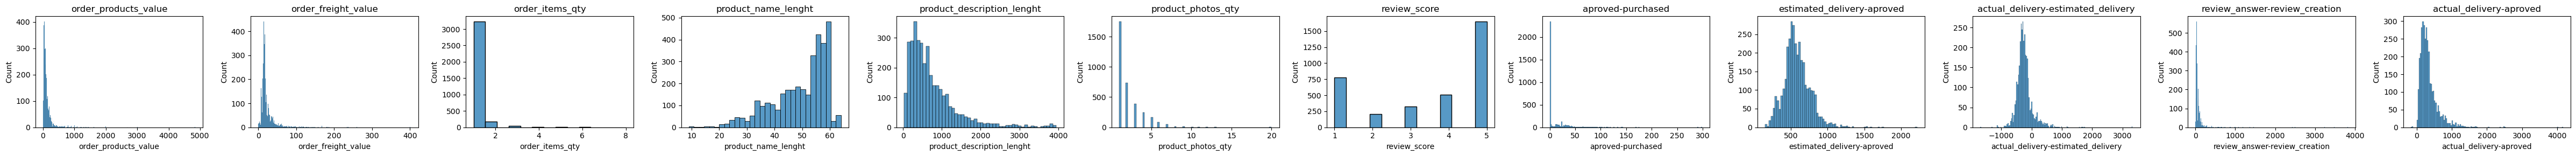

In [61]:
n = len(numerical_features)

# Настройка размера фигуры (важно для плотности)
fig, axes = plt.subplots(1, n, figsize=(4 * n, 3))  # один ряд, n колонок

for i, col in enumerate(numerical_features):
    sns.histplot(data=df, x=col, ax=axes[i], kde=False)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

#### Можно увидеть, что в признаках с непрерывным типом переменной есть выбросы. В дискретных признаках немного разных значений, поэтому это не будет проблемой в будущем.

#### Теперь следует избавиться от выбросов. Судя по распределениям у непрерывных признаков есть небольшой хвост, поэтому придется применить методы трансформации для корректного обнаружения выбросов.

In [292]:
print(classified_data['order_freight_value'].sort_values())

956       0.00
2177      0.01
2622      0.02
1315      0.02
2799      0.08
         ...  
2753    185.48
120     233.59
661     236.64
1679    259.70
1247    401.58
Name: order_freight_value, Length: 3467, dtype: float64
